# Disjunctive Graph representation

In [1]:
from job_shop_lib import JobShopInstance, Operation
from job_shop_lib.graphs import build_disjunctive_graph
from job_shop_lib.visualization.graphs import plot_disjunctive_graph

CPU = 0
GPU = 1
DATA_CENTER = 2

job_1 = [Operation(CPU, 1), Operation(GPU, 1), Operation(DATA_CENTER, 7)]
job_2 = [Operation(GPU, 5), Operation(DATA_CENTER, 1), Operation(CPU, 1)]
job_3 = [Operation(DATA_CENTER, 1), Operation(CPU, 3), Operation(GPU, 2)]

jobs = [job_1, job_2, job_3]

instance = JobShopInstance(jobs, name="Example")

In [2]:
graph = build_disjunctive_graph(instance)

In [3]:
graph.nodes

[Node(node_type=OPERATION, id=0, operation=O(m=0, d=1, j=0, p=0)),
 Node(node_type=OPERATION, id=1, operation=O(m=1, d=1, j=0, p=1)),
 Node(node_type=OPERATION, id=2, operation=O(m=2, d=7, j=0, p=2)),
 Node(node_type=OPERATION, id=3, operation=O(m=1, d=5, j=1, p=0)),
 Node(node_type=OPERATION, id=4, operation=O(m=2, d=1, j=1, p=1)),
 Node(node_type=OPERATION, id=5, operation=O(m=0, d=1, j=1, p=2)),
 Node(node_type=OPERATION, id=6, operation=O(m=2, d=1, j=2, p=0)),
 Node(node_type=OPERATION, id=7, operation=O(m=0, d=3, j=2, p=1)),
 Node(node_type=OPERATION, id=8, operation=O(m=1, d=2, j=2, p=2)),
 Node(node_type=SOURCE, id=9),
 Node(node_type=SINK, id=10)]

In [4]:
graph.nodes_by_type

defaultdict(list,
            {<NodeType.OPERATION: 1>: [Node(node_type=OPERATION, id=0, operation=O(m=0, d=1, j=0, p=0)),
              Node(node_type=OPERATION, id=1, operation=O(m=1, d=1, j=0, p=1)),
              Node(node_type=OPERATION, id=2, operation=O(m=2, d=7, j=0, p=2)),
              Node(node_type=OPERATION, id=3, operation=O(m=1, d=5, j=1, p=0)),
              Node(node_type=OPERATION, id=4, operation=O(m=2, d=1, j=1, p=1)),
              Node(node_type=OPERATION, id=5, operation=O(m=0, d=1, j=1, p=2)),
              Node(node_type=OPERATION, id=6, operation=O(m=2, d=1, j=2, p=0)),
              Node(node_type=OPERATION, id=7, operation=O(m=0, d=3, j=2, p=1)),
              Node(node_type=OPERATION, id=8, operation=O(m=1, d=2, j=2, p=2))],
             <NodeType.SOURCE: 5>: [Node(node_type=SOURCE, id=9)],
             <NodeType.SINK: 6>: [Node(node_type=SINK, id=10)]})

In [5]:
graph.nodes_by_machine

[[Node(node_type=OPERATION, id=0, operation=O(m=0, d=1, j=0, p=0)),
  Node(node_type=OPERATION, id=5, operation=O(m=0, d=1, j=1, p=2)),
  Node(node_type=OPERATION, id=7, operation=O(m=0, d=3, j=2, p=1))],
 [Node(node_type=OPERATION, id=1, operation=O(m=1, d=1, j=0, p=1)),
  Node(node_type=OPERATION, id=3, operation=O(m=1, d=5, j=1, p=0)),
  Node(node_type=OPERATION, id=8, operation=O(m=1, d=2, j=2, p=2))],
 [Node(node_type=OPERATION, id=2, operation=O(m=2, d=7, j=0, p=2)),
  Node(node_type=OPERATION, id=4, operation=O(m=2, d=1, j=1, p=1)),
  Node(node_type=OPERATION, id=6, operation=O(m=2, d=1, j=2, p=0))]]

In [6]:
graph.nodes_by_job

[[Node(node_type=OPERATION, id=0, operation=O(m=0, d=1, j=0, p=0)),
  Node(node_type=OPERATION, id=1, operation=O(m=1, d=1, j=0, p=1)),
  Node(node_type=OPERATION, id=2, operation=O(m=2, d=7, j=0, p=2))],
 [Node(node_type=OPERATION, id=3, operation=O(m=1, d=5, j=1, p=0)),
  Node(node_type=OPERATION, id=4, operation=O(m=2, d=1, j=1, p=1)),
  Node(node_type=OPERATION, id=5, operation=O(m=0, d=1, j=1, p=2))],
 [Node(node_type=OPERATION, id=6, operation=O(m=2, d=1, j=2, p=0)),
  Node(node_type=OPERATION, id=7, operation=O(m=0, d=3, j=2, p=1)),
  Node(node_type=OPERATION, id=8, operation=O(m=1, d=2, j=2, p=2))]]

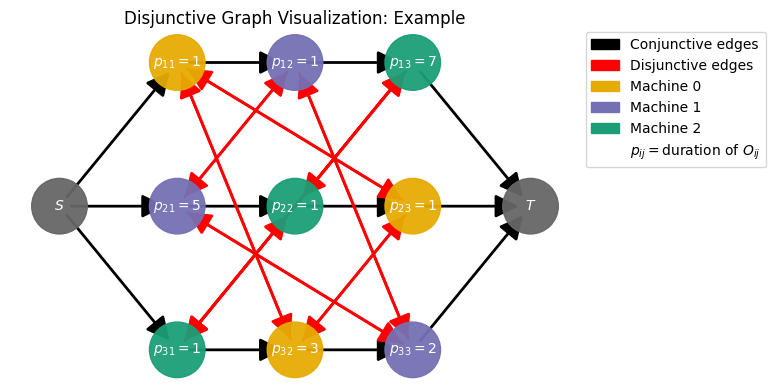

In [7]:
_ = plot_disjunctive_graph(graph, figsize=(6, 4))

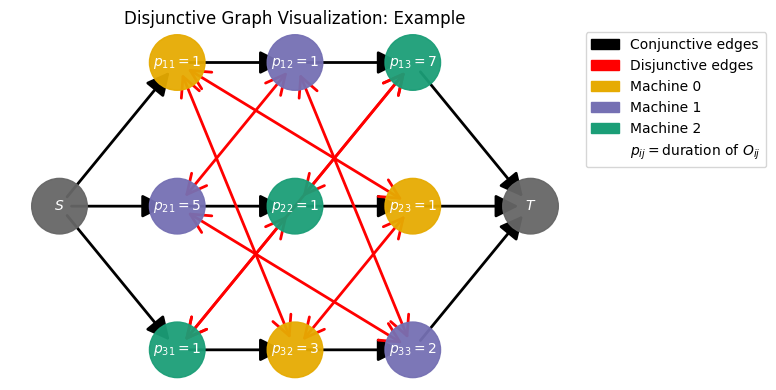

In [13]:
# You cal also pass the instance directly
_ = plot_disjunctive_graph(
    instance,
    figsize=(6, 4),
    draw_disjunctive_edges="single_edge",
    disjunctive_edges_additional_params={"arrowstyle": "<->"},
)

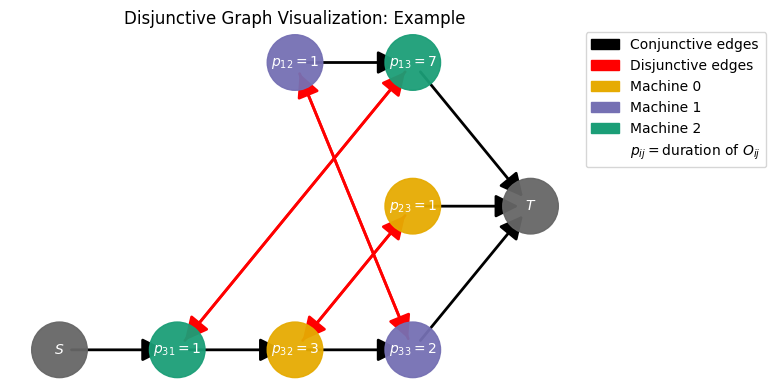

In [9]:
# Let's remove some nodes
graph.remove_node(0)
graph.remove_node(3)
graph.remove_node(4)
_ = plot_disjunctive_graph(graph, figsize=(6, 4))

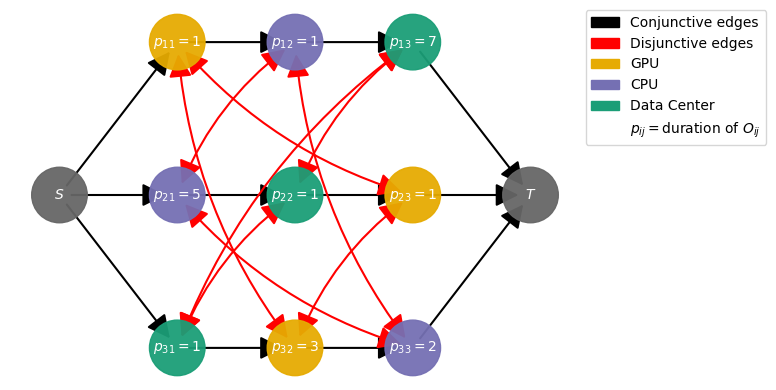

In [10]:
_ = plot_disjunctive_graph(
    instance,
    title="",
    machine_labels=[
        "GPU",
        "CPU",
        "Data Center",
    ],
    edge_width=1.5,
    draw_disjunctive_edges="single_edge",
    disjunctive_edges_additional_params={
        "connectionstyle": "arc3,rad=0.15",
        "arrowstyle": "<|-|>",
    },
)